In [258]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

from PIL.ImageColor import colormap
from scipy.stats import linregress
import libraries as lib

In [2]:
#20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Incapa Blad 300 N, 15 
#Piloot: 
#Teun van den Elzen (72kg) (11:0
#Tristan Ploeger (80kg) (13:30-2
#Tomas Kramer (70kg) (20:00- 

#20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Schroef Fee (Chopped Tips) 
#Folder: 
#Folders zijn weer begonnen vanaf mapje 1 vanwege het vervangen van de sd-kaart. 
#0002: Gaat het water in <--- 
#0003: Na opnieuw opstarten. 
#Piloot: 
#Tristan Ploeger (80kg) 
#Jonathan Meuleman (70kg) 

#20240708_Valence/0231 - 20240708T111346 8h9m54s 47.648km La Voulte-sur-Rhone - Tournon-sur-Rhone
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Schroef Fee (Chopped Tips) 
#Piloot: 
#Ruben Jans (77kg) 
#Bastiaan Buurman (75kg) 

#20240714_Limburg-Nijmegen\0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Incapa Blad 300 N, 15 m/s 
#Piloot: 
#Felix van Beusekom (78kg) (10:20-14:40) 
#Dennis van den Berg (73kg) (14:40-~17:30) 
#Jonathan Gessel (76kg) (~17:30-21:20) 

In [3]:
directory1 = "../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel"
directory2 = '../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240714_Limburg-Nijmegen/0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent'
directory3 = '../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240708_Valence/0231 - 20240708T111346 8h9m54s 47.648km La Voulte-sur-Rhone - Tournon-sur-Rhone'
directory4 = '../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors'

result1 = lib.DataUitzoekenGui(directory1)
result2 = lib.DataUitzoekenGui(directory2)
result3 = lib.DataUitzoekenGui(directory3)
result4 = lib.DataUitzoekenGui(directory4)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_05.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_07.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [304]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result1:
    merged_df1 = result1['merged_df'].copy()
    #merged_df2 = result2['merged_df'].copy()
    #merged_df3 = result3['merged_df'].copy()
    #merged_df4 = result4['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")

In [305]:
merged_df1

,1_Datalogger port,"1_Dataloggertijd, in s","1_MPPT-tijd, in s","1_Paneel 1 ingangsspanning, in V","1_Paneel 1 ingangsstroom, in I","1_Paneel 1 instantaan ingangsvermogen, in W","1_Paneel 1 totale ingangsenergie, in J","1_Paneel 2 ingangsspanning, in V","1_Paneel 2 ingangsstroom, in I","1_Paneel 2 instantaan ingangsvermogen, in W",...,"5_Gps-latitude, in graden",5_GPS richting,"5_Gps-tijd, in s",5_Format header (>05|05),"5_Paneel 1 ingangsspanning, in V","5_Uitgangsspanning, in V","5_Kanaal 1 instantaan uitgangsvermogen, in W","5_Gps-snelheid, in km/u",5_Pirano 1,5_Pirano 2
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:17,2.0,137.432109,1200.551736,20.520091,1.222273,43.175000,1.403547e+04,21.182909,1.216727,44.403455,...,5020.2014,9.7,60340.800000,05|07,-0.050,-0.166683,0.001,0.0,200,221
0 days 00:02:18,2.0,137.993885,1201.113462,20.557133,1.220663,43.513612,1.404957e+04,21.081939,1.220235,44.595745,...,5020.2014,9.7,60341.408163,05|07,-0.052,-0.165728,0.001,0.0,200,221
0 days 00:02:19,2.0,138.999369,1202.118929,20.635529,1.217696,43.665510,1.407482e+04,20.999480,1.225176,44.707304,...,5020.2014,9.7,60342.349057,05|07,-0.051,-0.165576,0.001,0.0,200,221
0 days 00:02:20,2.0,140.000394,1203.119943,20.715600,1.212442,43.540411,1.409996e+04,21.150800,1.218021,44.659474,...,5020.2014,9.7,60343.277228,05|07,-0.051,-0.165597,0.001,0.0,200,221
0 days 00:02:21,2.0,140.999270,1204.118814,20.637881,1.217366,43.537604,1.412506e+04,21.080851,1.222149,44.650535,...,5020.2014,9.7,60344.207547,05|07,-0.050,-0.165157,0.001,0.0,201,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 14:39:31,2.0,52770.997042,53833.132747,-0.083859,-0.017313,0.002424,1.355884e+06,-0.082424,-0.017576,0.002323,...,5110.7016,286.3,204054.030612,05|07,-0.043,-0.143247,0.001,0.0,-7,-8
0 days 14:39:32,2.0,52772.000473,53834.136150,-0.083960,-0.017560,0.002490,1.355884e+06,-0.082430,-0.017490,0.002280,...,5110.7016,286.3,204055.000000,05|07,-0.044,-0.144925,0.001,0.0,-7,-8
0 days 14:39:33,2.0,52773.003900,53835.139566,-0.083919,-0.017273,0.002444,1.355884e+06,-0.082646,-0.017525,0.002333,...,5110.7016,286.3,204055.979167,05|07,-0.042,-0.145139,0.001,0.0,-7,-8


In [306]:
#merged_df1 filter alle snelheden boven de 100 km/u
#merged_df1 = merged_df1[merged_df1['1_Gps-snelheid, in km/u'] < 100]

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Veronderstel dat 'merged_df1' je dataframe is

# Functie om de spanning- en stroomkolommen te identificeren
def identificeer_paneel_spanning_stroom(df):
    voltage_cols = []
    current_cols = []
    pattern_voltage = r'^\d+_Paneel \d+ ingangsspanning, in V$'
    pattern_current = r'^\d+_Paneel \d+ ingangsstroom, in I$'
    for col in df.columns:
        if re.match(pattern_voltage, col):
            voltage_cols.append(col)
        elif re.match(pattern_current, col):
            current_cols.append(col)
    return voltage_cols, current_cols

# Identificeer de spanning- en stroomkolommen
voltage_cols, current_cols = identificeer_paneel_spanning_stroom(merged_df1)

# Zorg ervoor dat de lijsten gesorteerd zijn zodat de volgorde van spanning en stroom overeenkomt
voltage_cols.sort()
current_cols.sort()

# Controleer welke kolommen zijn gevonden
print("Gevonden spanningskolommen:")
for col in voltage_cols:
    print(col)

print("\nGevonden stroomkolommen:")
for col in current_cols:
    print(col)


Gevonden spanningskolommen:
1_Paneel 1 ingangsspanning, in V
1_Paneel 2 ingangsspanning, in V
2_Paneel 1 ingangsspanning, in V
2_Paneel 2 ingangsspanning, in V
3_Paneel 1 ingangsspanning, in V
3_Paneel 2 ingangsspanning, in V
4_Paneel 1 ingangsspanning, in V
4_Paneel 2 ingangsspanning, in V
5_Paneel 1 ingangsspanning, in V
5_Paneel 2 ingangsspanning, in V

Gevonden stroomkolommen:
1_Paneel 1 ingangsstroom, in I
1_Paneel 2 ingangsstroom, in I
2_Paneel 1 ingangsstroom, in I
2_Paneel 2 ingangsstroom, in I
3_Paneel 1 ingangsstroom, in I
3_Paneel 2 ingangsstroom, in I
4_Paneel 1 ingangsstroom, in I
4_Paneel 2 ingangsstroom, in I
5_Paneel 1 ingangsstroom, in I
5_Paneel 2 ingangsstroom, in I


In [308]:
# Converteer de kolommen naar numeriek
merged_df1[voltage_cols] = merged_df1[voltage_cols].apply(pd.to_numeric, errors='coerce')
merged_df1[current_cols] = merged_df1[current_cols].apply(pd.to_numeric, errors='coerce')


In [309]:
# Bereken het vermogen voor elk paneel en sla dit op in nieuwe kolommen
power_cols = []
for v_col, i_col in zip(voltage_cols, current_cols):
    # Extracteer MPPT-nummer en paneelnummer uit de kolomnamen
    match = re.match(r'^(\d+)_Paneel (\d+) ingangsspanning, in V$', v_col)
    if match:
        mppt_number = match.group(1)
        panel_number = match.group(2)
        power_col_name = f'{mppt_number}_Paneel {panel_number} berekend vermogen, in W'
        # Bereken het vermogen
        merged_df1[power_col_name] = merged_df1[v_col] * merged_df1[i_col]
        power_cols.append(power_col_name)
    else:
        print(f"Kon geen match vinden voor kolomnaam: {v_col}")


In [310]:
# Bereken de totale output power
merged_df1.loc[:, 'Totale_MPPT_Output_W'] = merged_df1[power_cols].sum(axis=1)

In [311]:
# Aantal panelen is gelijk aan het aantal vermogen kolommen gevonden
aantal_panelen = len(power_cols)
oppervlakte_per_paneel = 1.14*0.51  # in m² (pas dit aan naar jouw situatie)
totale_oppervlakte = aantal_panelen * oppervlakte_per_paneel

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Veronderstel dat 'merged_df1' je dataframe is

# Stap 1: Identificeer de Pirano1-kolommen
def identificeer_pirano1_kolommen(df):
    pirano1_cols = []
    pattern = r'^\d+_Pirano \d+$'
    for col in df.columns:
        if re.match(pattern, col):
            pirano1_cols.append(col)
    return pirano1_cols

pirano1_cols = identificeer_pirano1_kolommen(merged_df1)

# Converteer Pirano1-kolommen naar numeriek
merged_df1[pirano1_cols] = merged_df1[pirano1_cols].apply(pd.to_numeric, errors='coerce')

# Bereken de gemiddelde irradiance
merged_df1.loc[:, 'Gemiddelde_Irradiance_W_per_m2'] = merged_df1[pirano1_cols].mean(axis=1)

In [313]:
merged_df1['Totale_Incident_Power_W'] = merged_df1['Gemiddelde_Irradiance_W_per_m2'] * totale_oppervlakte

# Vermijd deling door nul
merged_df1['Totale_Incident_Power_W'].replace(0, np.nan, inplace=True)

In [314]:
# filter alles boven de 1000 eruit de totale mppt output
merged_df1 = merged_df1[merged_df1['Totale_MPPT_Output_W'] < 3000]

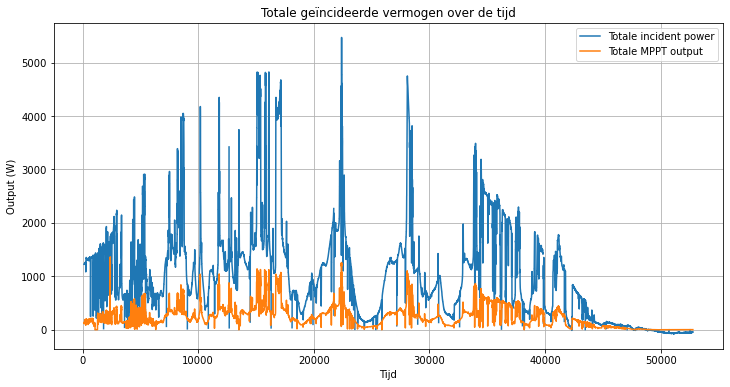

In [315]:
#plot totalinciden power
plt.figure(figsize=(12, 6))
plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1['Totale_Incident_Power_W'], label='Totale incident power')
plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1['Totale_MPPT_Output_W'], label='Totale MPPT output')
plt.title('Totale geïncideerde vermogen over de tijd')
plt.xlabel('Tijd')
plt.ylabel('Output (W)')
plt.legend()
plt.grid(True)
plt.show()

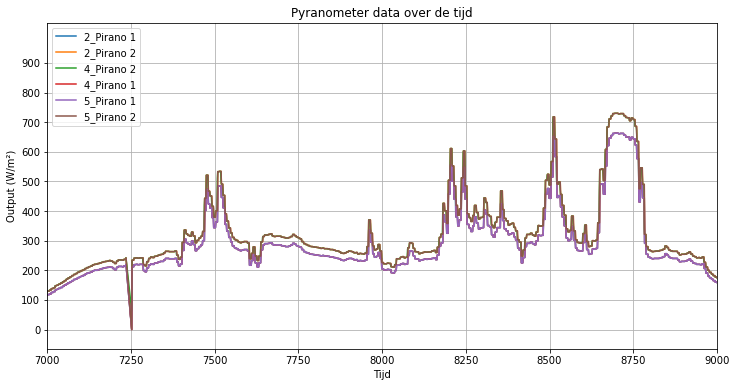

In [320]:
#filter prirano meter hoger dan 2000 eruit
merged_df1 = merged_df1[merged_df1['Totale_Incident_Power_W'] < 10000]

#plot de verschillende gevonden pyranometer kolommen tov van de tijd
plt.figure(figsize=(12, 6))
for col in pirano1_cols:
    
    plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1[col], label=col)
    plt.title('Pyranometer data over de tijd')
    plt.xlabel('Tijd')
    plt.ylabel('Output (W/m²)')
    plt.xlim(7000, 9000)
    plt.legend()
    plt.yticks(np.arange(0, 1000, 100))
    plt.grid(True)
plt.show()

In [272]:
merged_df1['Efficiëntie_perc'] = (
    merged_df1['Totale_MPPT_Output_W'] / merged_df1['Totale_Incident_Power_W']
) * 100

# Verwijder eventuele NaN-waarden
merged_df1.dropna(subset=['Efficiëntie_perc'], inplace=True)

In [273]:
#filter snelheden boven de 100km/u eruit
#merged_df1 = merged_df1[merged_df1['1_Gps-snelheid, in km/u'] < 100]
#en effcienties boven de 200%
merged_df1 = merged_df1[merged_df1['Efficiëntie_perc'] < 100]
merged_df1 = merged_df1[merged_df1['Efficiëntie_perc'] > -100]
#filter eruit als de priano meter onder de 0 is
merged_df1 = merged_df1[merged_df1['Totale_Incident_Power_W'] > 0]

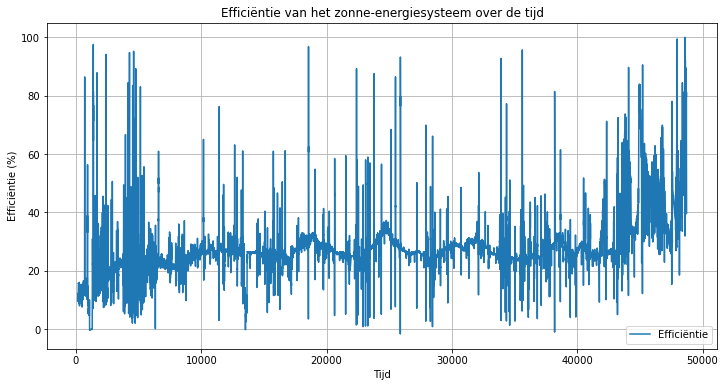

In [274]:
# Efficiëntie over de tijd plotten
plt.figure(figsize=(12, 6))
plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1['Efficiëntie_perc'], label='Efficiëntie')
plt.title('Efficiëntie van het zonne-energiesysteem over de tijd')
plt.xlabel('Tijd')
plt.ylabel('Efficiëntie (%)')
plt.legend()
plt.grid(True)
plt.show()

In [275]:
#sorteer de data op tijd
merged_df1.sort_values(by='1_Dataloggertijd, in s', inplace=True)

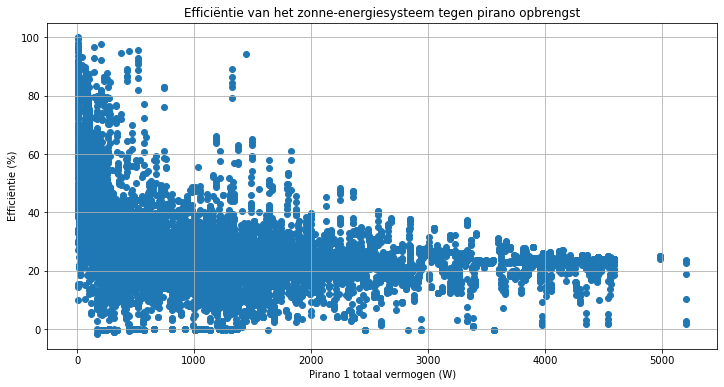

In [285]:
#plot efficiëntie tegen pirano opbrengst
plt.figure(figsize=(12, 6))

plt.scatter(merged_df1['Totale_Incident_Power_W'], merged_df1['Efficiëntie_perc'])
plt.title('Efficiëntie van het zonne-energiesysteem tegen pirano opbrengst')
plt.xlabel('Pirano 1 totaal vermogen (W)')
plt.ylabel('Efficiëntie (%)')
plt.grid(True)

plt.show()

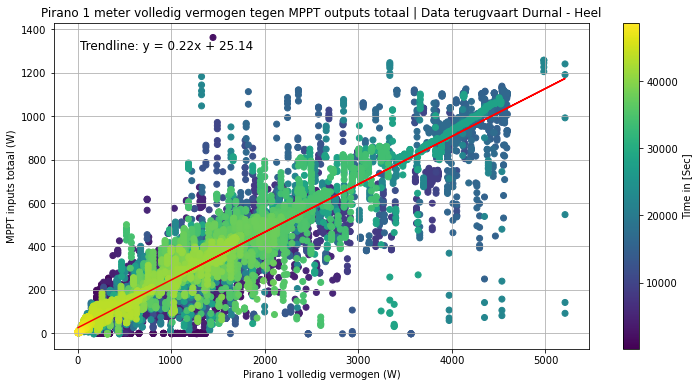

In [288]:
import matplotlib.pyplot as plt
import numpy as np

# Plot prirano meter tegen mppt outputs totaal
plt.figure(figsize=(12, 6))
plt.scatter(merged_df1['Totale_Incident_Power_W'], merged_df1['Totale_MPPT_Output_W'], label='Data points',c=merged_df1['1_Dataloggertijd, in s'])

# Calculate the linear trendline
slope, intercept = np.polyfit(merged_df1['Totale_Incident_Power_W'], merged_df1['Totale_MPPT_Output_W'], 1)
trendline = slope * merged_df1['Totale_Incident_Power_W'] + intercept

# Plot the trendline
plt.plot(merged_df1['Totale_Incident_Power_W'], trendline, color='red', label='Trendline')

# Add titles and labels
plt.title('Pirano 1 meter volledig vermogen tegen MPPT outputs totaal | Data terugvaart Durnal - Heel')
plt.xlabel('Pirano 1 volledig vermogen (W)')
plt.ylabel('MPPT inputs totaal (W)')
#plt.legend()
plt.grid(True)
#plt.colorbar()
#add colorbar name and label as time in s
plt.colorbar().set_label('Time in [Sec]')

# Add the trendline formula as text annotation
formula = f'Trendline: y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.05, 0.95, formula, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

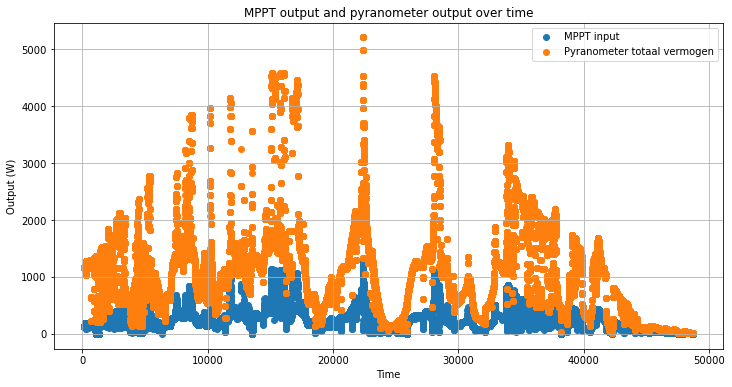

In [289]:
# Plot the MPPT output and pyranometer output over time
plt.figure(figsize=(12, 6))
plt.scatter(merged_df1['1_Dataloggertijd, in s'], merged_df1['Totale_MPPT_Output_W'], label='MPPT input')
plt.scatter(merged_df1['1_Dataloggertijd, in s'], merged_df1['Totale_Incident_Power_W'], label='Pyranometer totaal vermogen')
plt.title('MPPT output and pyranometer output over time')
plt.xlabel('Time')
plt.ylabel('Output (W)')
#plt.ylim(0,2000)  # Set y-axis limits correctly
plt.legend()
plt.grid(True)
plt.show()
